### Methodology: Elastic Net Regression
Hybrid Regularization: Elastic Net combines both L1 (Lasso) and L2 (Ridge) penalties, allowing the model to benefit from both feature selection and coefficient stability.

Balance of Strengths: It is designed to overcome the limitations of Lasso when dealing with highly correlated features; while Lasso might arbitrarily pick one and zero out the others, Elastic Net tends to include them as a group.

Hyperparameter Tuning ($L1\_ratio$): This model introduces a mixing parameter that allows us to control the balance between L1 and L2 regularization, making it highly adaptable to the specific structure of our 10-million-row dataset.

Robustness: By using this hybrid approach, we aim to achieve the most stable linear predictions for days_since_prior_order, especially in the presence of complex behavioral correlations.

--- Elastic Net Performance ---
MAE: 7.7455
MSE: 88.5169
RMSE: 9.4083
R2 Score: 0.0785
Adjusted R2: 0.0785

--- Statistical Tests ---
Breusch-Pagan p-value: 0.0000


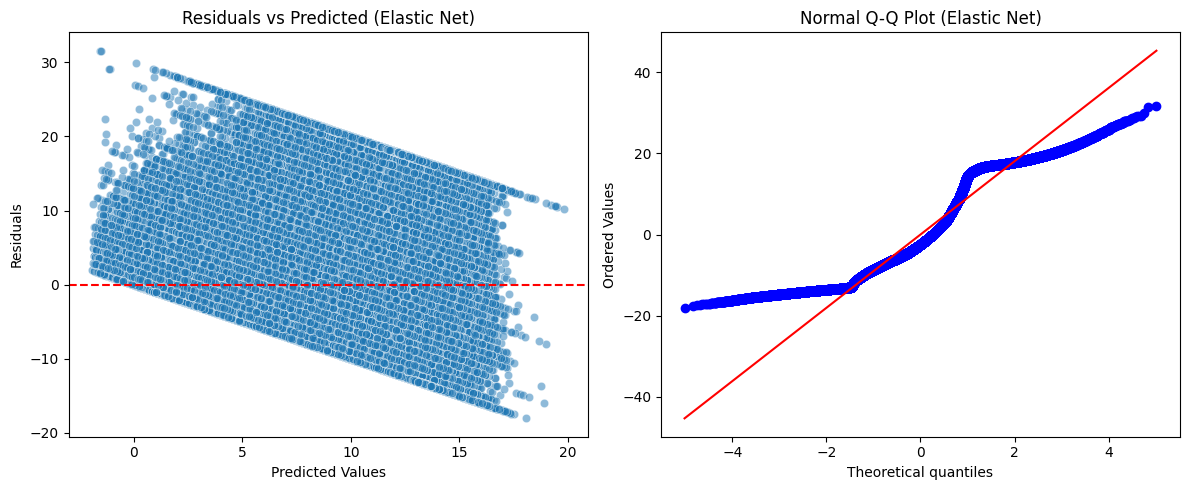

In [ ]:
# --- Feature Scaling (Crucial for Elastic Net Regularization) ---
# Elastic Net is sensitive to the scale of features because of the L1 and L2 penalties
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# --- MODEL 4: Elastic Net Regression (L1 + L2) ---
# Combines L1 and L2 penalties to handle multicollinearity and perform feature selection
# l1_ratio=0.5 means an equal balance between Lasso and Ridge effects
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_reg.fit(X_train_scaled, y_train)
elastic_pred = elastic_reg.predict(X_test_scaled)

# Numerical Evaluation using the custom function
evaluate_regression("Elastic Net", y_test, elastic_pred, X_test_scaled)

In [ ]:
# Deleting model and prediction objects to free up RAM for ensemble models
del elastic_reg, elastic_pred, X_train_scaled, X_test_scaled
gc.collect()

22753